# Crawling Tugas 2

## Crawling PTA - Skripsi Mahasiswa Fakultas Teknik

In [3]:
import requests
from bs4 import BeautifulSoup

In [5]:
import pandas as pd, time, csv
responses = []
data = {"penulis": [], "judul": [], "pembimbing_pertama": [], "pembimbing_kedua": [], "abstrak_id": [], "abstrak_en": [], "prodi":[]}
with open("./csv/skripsi-pta-utm-teknik.csv", "a", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["penulis", "judul", "pembimbing_pertama", "pembimbing_kedua", "abstrak_id", "abstrak_en", "prodi",])
url_byprod = "https://pta.trunojoyo.ac.id/c_search/byprod/"
for no_prod in ["9","10","11","19","20","23","31","32","33",]:
    for i in range(1,1000): # tiap url: 1-1000 paginasi

        # for t in range(1,4):
        #     time.sleep(1)
        #     print(t,'.. ', end='')

        url_paginasi = url_byprod + no_prod + '/' + str(i)
        print(f"{url_paginasi}: paginasi {i} --",end="")

        # requests tiap paginasi
        response = requests.get(url_paginasi)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')

        prodi = (soup.find_all('h2')[0].get_text()).strip().split('Jurusan')[1]
        print(prodi)

        journals = soup.select("li[data-cat='#luxury']")

        if journals: # alias jika journals != []: maka lanjut lihat semua detail


            # tiap paginasi: 1-10 jurnal
            for j in journals:
                # print('\t',end='')
                # for t in range(1,4):
                #     time.sleep(1)
                #     print(t,'.. ', end='')

                # requests tiap detail/selengkapnya sebuah skripsi
                response_selengkapnya = requests.get(j.select_one('a.gray.button')['href'])
                response.raise_for_status()

                soup_selengkapnya = BeautifulSoup(response_selengkapnya.content, 'html.parser')

                isi = soup_selengkapnya.select_one('div#content_journal')

                judul = isi.select_one('a.title').text
                print(f"\tjudul: {judul[:10]}...")

                penulis = isi.select_one('span:contains("Penulis")').text.split(' : ')[1]

                pembimbing1 = isi.select_one('span:contains("Dosen Pembimbing I")').text.split(' : ')[1]
                pembimbing2 = isi.select_one('span:contains("Dosen Pembimbing II")').text.split(' :')[1]

                abstracts = isi.select('p[align="justify"]')

                ab_id = abstracts[0].text
                ab_en = abstracts[1].text

                data["penulis"].append(penulis)
                data["judul"].append(judul)
                data["pembimbing_pertama"].append(pembimbing1)
                data["pembimbing_kedua"].append(pembimbing2)
                data["abstrak_id"].append(ab_id)
                data["abstrak_en"].append(ab_en)
                data["prodi"].append(prodi)


                with open("./csv/skripsi-pta-utm-teknik.csv", "a", newline="", encoding="utf-8") as f:
                    writer = csv.writer(f)
                    writer.writerow([penulis, judul, pembimbing1, pembimbing2, ab_id, ab_en, prodi])


                # test
                # print(f"{judul}\n{penulis} -- {pembimbing1} -- {pembimbing2} -- {prodi}\n{ab_id}\n\n\n{ab_en}")

        else: # jika journals == []: berhenti (tidak sampai 1000) lanjut ke url byprod/d selanjutnya
            break


df = pd.DataFrame(data)
df.to_csv("./csv/fromDf-skripsi-pta-utm.csv", index=False)

https://pta.trunojoyo.ac.id/c_search/byprod/9/1: paginasi 1 -- Teknik Industri
	judul: OPTIMASI P...


/usr/local/lib/python3.12/dist-packages/soupsieve/css_parser.py:876: FutureWarning: The pseudo class ':contains' is deprecated, ':-soup-contains' should be used moving forward.
  warnings.warn(  # noqa: B028


	judul: PERANCANGA...
	judul: PERUMUSAN ...
	judul: USULAN PER...
	judul: Peningkata...
https://pta.trunojoyo.ac.id/c_search/byprod/9/2: paginasi 2 -- Teknik Industri
	judul: Perencanaa...
	judul: USULAN PER...
	judul: PERENCANAA...
	judul: Pengaruh a...
	judul: Pendekatan...
https://pta.trunojoyo.ac.id/c_search/byprod/9/3: paginasi 3 -- Teknik Industri
	judul: Analisis P...
	judul: ANALISA PR...
	judul: Identifika...
	judul: PERANCANGA...
	judul: ANALISIS P...
https://pta.trunojoyo.ac.id/c_search/byprod/9/4: paginasi 4 -- Teknik Industri
	judul: Desain Per...
	judul: PENJADWALA...
	judul: PERANCANGA...
	judul: PENERAPAN ...
	judul: ANALISIS K...
https://pta.trunojoyo.ac.id/c_search/byprod/9/5: paginasi 5 -- Teknik Industri
	judul: ANALISIS R...
	judul: PERANCANGA...
	judul: Analisis E...
	judul: ANALISIS P...
	judul: PENDEKATAN...
https://pta.trunojoyo.ac.id/c_search/byprod/9/6: paginasi 6 -- Teknik Industri
	judul: MPLEMENTAS...
	judul: Knowledge ...
	judul: Penilaian ...
	judul: Imp

In [43]:
df = pd.read_csv("./csv/fromDf-skripsi-pta-utm.csv")

df.insert(0, "nomor", range(1, len(df) + 1))

df.to_csv("./csv/fromDf-skripsi-pta-utm-with-nomor.csv", index=False)

print("done")

done


In [45]:
df = pd.read_csv("./csv/fromDf-skripsi-pta-utm-with-nomor.csv")
df


,nomor,penulis,judul,pembimbing_pertama,pembimbing_kedua,abstrak_id,abstrak_en,prodi
0,1,Siliwangi Fitra Rachmawanto S.T.,OPTIMASI PEMILIHAN PORTOFOLIO SAHAM PERUSAHAAN...,"Heri Awalul Ilhamsah S.T., M.T.","Retno Indriartiningtias S.T., M.T.",Portofolio adalah sekumpulan saham yang dimili...,Portofolio is a collection of stock owned by i...,Teknik Industri
1,2,AHMAD MAS'UD,PERANCANGAN TATA LETAK FASILITAS LANTAI PRODUK...,"SABARUDIN AKHMAD, S.T., M.T.","SUGENG PURWOKO, S.T., M.T.",PT. ABC merupakan perusahaan yang bergerak dib...,PT. ABC is a company engaged in the manufactur...,Teknik Industri
2,3,Yulianto Fauzanta,PERUMUSAN STRATEGI BISNIS UD. BUDI JAYA BANGKA...,"Fitri Agustina, S.T., M.T","Retno Indriartiningtias, S.T., M.T",Bangkalan merupakan salah satu kabupaten yang ...,Bangkalan is one of the districts that have th...,Teknik Industri
3,4,M Mundir Muhlisin,USULAN PERBAIKAN UTILITAS RESOURCES PADA LANTA...,Mu'alim ST MT,Sugeng Purwoko ST MT,Simulasi adalah duplikasi atau abstraksi dari ...,Simulation is a duplication or abstraction of ...,Teknik Industri
4,5,Muhibbin,Peningkatan Kepuasan Masyarakat Terhadap Pelay...,Rahmad Hidayat,Retno Indriartiningtias,Kepuasan adalah tingkat perasaan seseorang ter...,Satisfaction is feeling level of someone to se...,Teknik Industri
...,...,...,...,...,...,...,...,...
2293,2294,MOH TAUFIK HIDAYAT,ALAT PENGGULUNG UNTUK MENGATUR KERAPATAN KERTA...,"FAIKUL UMAM., S.KOM., M.T","SRI WAHYUNI., S.KOM., M.T",ABSTRAK\n\nKertas merupakan kebutuhan yang dib...,ABSTRACT\n\nPaper is a necessity needed by hum...,Teknik Mekatronika
2294,2295,Alvian Ainun Fajrih,Optimasi Penguapan Air Laut Tua Pada Rumah Kaca,"Hairil Budiarto, S.T., M.T.","Faikul Umam, S.Kom., M.T.",Pembuatan garam di Madura umumnya dilakukan de...,Making salt in Madura is generally done by hea...,Teknik Mekatronika
2295,2296,ADINDA DEBTIANA DWIKA HILDA,KESTABILAN KECEPATAN MOBILE ROBOT PADA LINTASA...,"Faikul Umam, S.Kom., M.T.","Sri Wahyuni, S.Kom., M.T.",Mobile robot merupakan salah satu kategori ro...,Mobile robot is one of the robot categories th...,Teknik Mekatronika
2296,2297,Nafizatul Jamilah,Rancang Bangun Sistem Otomasi Robot Pengecatan...,"Hairil Budiarto, S.T., M.T","Sri Wahyuni, S.Kom., M.T",ABSTRAK\n\nMarka jalan raya adalah sebuah tand...,ABSTRACT\n\nA highway mark is a sign that can ...,Teknik Mekatronika


## Crawling berita online

In [ ]:
from newsdataapi import NewsDataApiClient

In [ ]:
api = NewsDataApiClient(apikey='pub_b45a9cfdd8db4aa7988324a70d07f4c8')

response_qai = api.latest_api(q='artificial intelligence', scroll=True, max_result=40)

In [ ]:
for a in response_qai['results']:
    title = a['title']
    creator = a['creator']
    content = a['content']
    category = a['category']
    # print(f"{title} -- {category} -- {creator}")
    print(content,'\n\n\n\n')

South Korean stocks opened higher on Thursday, heading to set a new all-time high, as investor sentiment was boosted by overnight gains on Wall Street driven by growing hopes for a rate cut by the Federal Reserve and a rally of artificial intelligence shares. The benchmark Korea Composite Stock Price Index added 20.16 points, or 0.61 percent, to 3,334.69 in the first 15 minutes of trading, breaking the record high of 3,314.53 posted the previous day. Overnight, the S&P 500 closed 0.3 percent higher and the tech-heavy Nasdaq composite inched up 0.03 percent, driven by sharp gains in cloud provider Oracle and AI-related shares, such as Nvidia, AMD and Broadcom. The Dow Jones Industrial Average, however, closed 0.48 percent lower. The fresh US producer price data, which showed a decline for the first time in four months, also boosted optimism that the Fed will cut its key rate next week. Investors' eyes are now on the US consumer price index for August due out on Thursday, which will prov

In [ ]:
len(response_qai['results'])

50

In [ ]:
response_hse = api.latest_api(q='health OR science OR education', scroll=True, max_result=20)

In [ ]:
print(response_hse)

{'totalResults': 56014, 'results': [{'article_id': 'b82c069fee9bea1b66ee33e01647c8d2', 'title': '很多人愛吃!它害人笨、失智、巴金森氏症', 'link': 'https://www.setn.com/News.aspx?NewsID=1718572', 'keywords': ['巴金森氏症', '薛曉晶', '超加工食品', 'upf', '失智症'], 'creator': ['施春美'], 'description': '一般人自覺健忘、專注力下降,多歸咎於年紀問題,但營養師薛曉晶表示,一項研究發現,常吃超加工食品(UPF)的人,認知功能下降速度比低攝取組快28%,執行功能更下降25%。另一項研究也指出,吃大量超加工食品與失智症風險增加44%有關。此外,每天吃大量超加工食品的人出現巴金森氏症狀是少吃者的2.5倍。', 'content': '記者施春美/台北報導 一般人自覺健忘、專注力下降,多歸咎於年紀問題,但營養師薛曉晶表示,一項研究發現,常吃超加工食品(UPF)的人,認知功能下降速度比低攝取組快28%,執行功能更下降25%。另一項研究也指出,吃大量超加工食品與失智症風險增加44%有關。此外,每天吃大量超加工食品的人出現巴金森氏症狀是少吃者的2.5倍。 現代生活講求快速,速食、微波餐等看似方便,但薛曉晶在其 臉書 表示,科學已證實,這些「超加工食品」(UPF)正逐步侵蝕人的認知功能與情緒迴路。 2019年《Public Health Nutrition》專文指出,UPF多為工業配方,富含高糖、高鹽、高油及添加物,而原型食材比例極低。 2023年《JAMA Neurology》研究追蹤逾萬名35~74歲成年人長達8年,結果發現,高UPF飲食組的認知功能下降速度比低攝取組快28%,執行功能也下降25%。這意味,長期依賴UPF會讓「腦力退化」提早報到。 另一項研究也證實,中年人每多攝取10% UPF,未來發生輕度認知障礙或失智的風險就會上升;若能以天然食物替代部分UPF,失智風險則顯著降低。 失智症不再是老年專屬 中年飲食習慣才是關鍵 薛曉晶表示,2024年《Journal of Neurology》統合分析超過50萬人數據,發現高UPF攝取與罹患失智症(含阿茲海默症

In [ ]:
for a in response_hse['results']:
    title = a['title']
    creator = a['creator']
    content = a['content']
    category = a['category']
    # print(f"{title} -- {category} -- {creator}")
    print(content,'\n\n\n\n')

記者施春美/台北報導 一般人自覺健忘、專注力下降,多歸咎於年紀問題,但營養師薛曉晶表示,一項研究發現,常吃超加工食品(UPF)的人,認知功能下降速度比低攝取組快28%,執行功能更下降25%。另一項研究也指出,吃大量超加工食品與失智症風險增加44%有關。此外,每天吃大量超加工食品的人出現巴金森氏症狀是少吃者的2.5倍。 現代生活講求快速,速食、微波餐等看似方便,但薛曉晶在其 臉書 表示,科學已證實,這些「超加工食品」(UPF)正逐步侵蝕人的認知功能與情緒迴路。 2019年《Public Health Nutrition》專文指出,UPF多為工業配方,富含高糖、高鹽、高油及添加物,而原型食材比例極低。 2023年《JAMA Neurology》研究追蹤逾萬名35~74歲成年人長達8年,結果發現,高UPF飲食組的認知功能下降速度比低攝取組快28%,執行功能也下降25%。這意味,長期依賴UPF會讓「腦力退化」提早報到。 另一項研究也證實,中年人每多攝取10% UPF,未來發生輕度認知障礙或失智的風險就會上升;若能以天然食物替代部分UPF,失智風險則顯著降低。 失智症不再是老年專屬 中年飲食習慣才是關鍵 薛曉晶表示,2024年《Journal of Neurology》統合分析超過50萬人數據,發現高UPF攝取與罹患失智症(含阿茲海默症、血管型失智)風險增加44%有關。2025年哈佛與復旦大學研究顯示,每日攝取約11份UPF的人,出現巴金森氏症早期非運動症狀(如便秘、睡眠障礙)的風險,是低攝取者的2.5倍。「這些都顯示UPF可能在無形中加速神經退化。」 至於UPF會如此傷腦,薛曉晶表示,研究者提出3大關鍵機制: 1. 慢性發炎 :UPF的高糖、高脂、乳化劑及人工甜味劑等成分,會引發低度慢性發炎,進而導致神經發炎,加速阿茲海默與巴金森氏症的病理進展。 2. 氧化壓力 :油炸與高溫加工產生自由基,會使腦細胞DNA與膜結構受損,導致腦萎縮。 3. 腸腦軸失衡 :2025年《Nutrients》(營養素)研究指出,UPF會改變腸道菌群,減少益菌,增加腸道通透性,引發全身性發炎,進而透過「腸腦軸」影響情緒與認知。 她表示,超加工食品的危害不僅是體重增加,更是大腦功能的全面退化,涵括認知下降到失智症。民眾應從此刻起多吃原型食物、少吃超加工食品,大腦會用更清晰的思緒、更穩定的情緒,來回報自

In [ ]:
len(response_hse['results'])

50

In [ ]:
api = NewsDataApiClient(apikey='pub_b45a9cfdd8db4aa7988324a70d07f4c8',debug=True)

response_schEdtchLtr = api.news_api(q='scholarship OR edtech OR literacy',max_result=25, scroll=True)

C:\Users\BRIAN\AppData\Local\Temp\ipykernel_14452\844284737.py:3: DeprecationWarning: This method is deprecated and will be removed in upcoming updates, Instead use latest_api()
  response_schEdtchLtr = api.news_api(q='scholarship OR edtech OR literacy',max_result=25, scroll=True)


Debug | 2025-09-11 00:43:06 | x_rate_limit_remaining: 179997 | x_api_limit_remaining: 997
Debug | 2025-09-11 00:43:06 | total results: 2000 | extracted: 50


In [ ]:
print(response_schEdtchLtr)

{'totalResults': 2000, 'results': [{'article_id': 'ea97bb87f08449f280ec345e9bccd327', 'title': 'No Injustice To OBCs, Accept Only Verified Records For Maratha-Kunbi Certificate: Bawankule', 'link': 'https://timesofindia.indiatimes.com/city/nagpur/no-injustice-to-obcs-accept-only-verified-records-for-maratha-kunbi-certificate-bawankule/articleshow/123816212.cms', 'keywords': ['obc reservations', 'obc welfare', 'maratha-kunbi certificate', 'obc scholarships', 'maharashtra obc subcommittee'], 'creator': ['Vaibhav Ganjapure'], 'description': None, 'content': 'Nagpur: The first meeting of the Maharashtra cabinet subcommittee on Other Backward Classes (OBCs) underscored that no injustice will be meted out to the community, but only verified claims of Marathas having genuine Kunbi records will be entertained. Revenue Minister Chandrashekhar Bawankule, who heads the panel, in a statement to media stated that there is an apprehension among OBCs that they may face injustice, "but this will not h

In [ ]:
for a in response_schEdtchLtr['results']:
    title = a['title']
    creator = a['creator']
    content = a['content']
    category = a['category']
    # print(f"{title} -- {category} -- {creator}")
    print(content,'\n\n\n\n')

Nagpur: The first meeting of the Maharashtra cabinet subcommittee on Other Backward Classes (OBCs) underscored that no injustice will be meted out to the community, but only verified claims of Marathas having genuine Kunbi records will be entertained. Revenue Minister Chandrashekhar Bawankule, who heads the panel, in a statement to media stated that there is an apprehension among OBCs that they may face injustice, "but this will not happen". "Only those with proper Kunbi records will be issued certificates as per the govt resolution. Verification will be done through documents, genealogy, and reports from village committees and the tehsildar's office," Bawankule said. The meeting held at Mantralaya in Mumbai was attended by ministers including Chhagan Bhujbal, Ganesh Naik, Sanjay Rathod, Pankaja Munde, Atul Save and Dattatray Bharne, along with officials. Bawankule highlighted that the state's OBC population spans 353 castes, many of whom await their share of Rs3,688 crore in pending f

In [ ]:
response_list = [response_qai, response_hse, response_schEdtchLtr]
data_berita = {'article_id':[], 'title':[], 'content':[], 'category':[], 'link':[]}
for response in response_list:
    for a in response['results']:
        data_berita['article_id'].append(a['article_id'])
        data_berita['title'].append(a['title'])
        data_berita['content'].append(a['content'])
        data_berita['category'].append(a['category'])
        data_berita['link'].append(a['link'])

In [ ]:
import pandas as pd
df2 = pd.DataFrame(data_berita)
df2

,article_id,title,content,category,link
0,51b4d9f6a4b1e2a73df1db16e2f493c7,"Seoul shares open higher on techs, batteries","South Korean stocks opened higher on Thursday,...","[top, business]",https://www.koreaherald.com/article/10573160
1,ac5b5504ffdfb03a24f47f37dfb181cc,10 Stocks Crushing the Market; 6 Climb to Fres...,"Ten companies stood firmer on Wednesday, outpe...",[business],https://www.insidermonkey.com/blog/10-stocks-c...
2,0c243c9dfb267ed0d5a088bb41d07c46,ControlZ simplifies refurbished phone purchase...,"The terminology you use may vary, but the thin...",[technology],https://www.hindustantimes.com/technology/cont...
3,350bb452abd0f04e9fdd9e3ea518b268,Samsung Display eyes bolstering mobility portf...,Samsung Display Co. will continue efforts to e...,"[technology, top]",https://www.koreaherald.com/article/10573123
4,eaa9a84c577facb25c72ecf8bd10070b,US House approves defense policy bill with 'cu...,By Patricia Zengerle WASHINGTON (Reuters) -The...,[sports],https://ca.news.yahoo.com/us-house-approves-de...
...,...,...,...,...,...
145,7fc9d7ed0a4858c82b79908225019fd7,Defence Academy cadets urged to embrace invest...,Graduating cadets of the Nigerian Defence Acad...,"[top, business]",https://tribuneonlineng.com/defence-academy-ca...
146,1f242bb396c2ac03a1fe53ed75fd1449,محو الأمية الرقمية,لم تعد الأمية اليوم مرتبطة بعدم القدرة على ال...,"[lifestyle, top]",https://www.alriyadh.com/2150253
147,27cb1fff542f14b2df80a21ff7bfbbb9,Prized Texas Longhorns Commit Visiting Ole Mis...,Monroe (La.) Ouachita Parish four-star defensi...,[sports],https://www.si.com/college/olemiss/recruiting/...
148,54725f3c4bb7dc5119ce54fafb0f61df,BOE hears explanation for establishing focus p...,"RIPLEY, W.Va. (WV News) -- The Jackson County ...","[education, top]",https://www.wvnews.com/jacksonnews/boe-hears-e...


In [ ]:
import json

with open("./csv/response_qai.json",'w',encoding='utf-8') as f:
    json.dump(response_qai, f, ensure_ascii=False, indent=4)

with open("./csv/response_hse.json",'w',encoding='utf-8') as f:
    json.dump(response_hse, f, ensure_ascii=False, indent=4)

with open("./csv/response_schEdtchLtr.json",'w',encoding='utf-8') as f:
    json.dump(response_schEdtchLtr, f, ensure_ascii=False, indent=4)


## Crawling link keluaran

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
sitemap_url = "https://pertanian.trunojoyo.ac.id/wp-sitemap.xml"
resp = requests.get(sitemap_url, verify=False)
soup = BeautifulSoup(resp.content, "xml")


d:\Akademik\Semester 5\PPW\ppw\ppw\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pertanian.trunojoyo.ac.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [ ]:
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<?xml-stylesheet type="text/xsl" href="https://pertanian.trunojoyo.ac.id/wp-sitemap-index.xsl" ?>
<sitemapindex xmlns="http://www.sitemaps.org/schemas/sitemap/0.9">
 <sitemap>
  <loc>
   https://pertanian.trunojoyo.ac.id/wp-sitemap-posts-post-1.xml
  </loc>
 </sitemap>
 <sitemap>
  <loc>
   https://pertanian.trunojoyo.ac.id/wp-sitemap-posts-page-1.xml
  </loc>
 </sitemap>
 <sitemap>
  <loc>
   https://pertanian.trunojoyo.ac.id/wp-sitemap-posts-course-1.xml
  </loc>
 </sitemap>
 <sitemap>
  <loc>
   https://pertanian.trunojoyo.ac.id/wp-sitemap-posts-personnel-1.xml
  </loc>
 </sitemap>
 <sitemap>
  <loc>
   https://pertanian.trunojoyo.ac.id/wp-sitemap-posts-portfolio-1.xml
  </loc>
 </sitemap>
 <sitemap>
  <loc>
   https://pertanian.trunojoyo.ac.id/wp-sitemap-taxonomies-category-1.xml
  </loc>
 </sitemap>
 <sitemap>
  <loc>
   https://pertanian.trunojoyo.ac.id/wp-sitemap-taxonomies-post_tag-1.xml
  </loc>
 </sitemap>
 <sitemap>
  <loc>
   https://p

In [ ]:
sitemap_links = [loc.text for loc in soup.find_all("loc")]
print("Daftar sitemap turunan:")
for link in sitemap_links:
    print(link)


Daftar sitemap turunan:
https://pertanian.trunojoyo.ac.id/wp-sitemap-posts-post-1.xml
https://pertanian.trunojoyo.ac.id/wp-sitemap-posts-page-1.xml
https://pertanian.trunojoyo.ac.id/wp-sitemap-posts-course-1.xml
https://pertanian.trunojoyo.ac.id/wp-sitemap-posts-personnel-1.xml
https://pertanian.trunojoyo.ac.id/wp-sitemap-posts-portfolio-1.xml
https://pertanian.trunojoyo.ac.id/wp-sitemap-taxonomies-category-1.xml
https://pertanian.trunojoyo.ac.id/wp-sitemap-taxonomies-post_tag-1.xml
https://pertanian.trunojoyo.ac.id/wp-sitemap-taxonomies-post_format-1.xml
https://pertanian.trunojoyo.ac.id/wp-sitemap-taxonomies-personnel_category-1.xml
https://pertanian.trunojoyo.ac.id/wp-sitemap-taxonomies-portfolio_category-1.xml
https://pertanian.trunojoyo.ac.id/wp-sitemap-taxonomies-portfolio_tag-1.xml
https://pertanian.trunojoyo.ac.id/wp-sitemap-taxonomies-department-1.xml
https://pertanian.trunojoyo.ac.id/wp-sitemap-taxonomies-campus-1.xml
https://pertanian.trunojoyo.ac.id/wp-sitemap-taxonomies-le

In [ ]:
article_sitemap = sitemap_links[0]  # contoh ambil yang pertama
resp2 = requests.get(article_sitemap, verify=False)
soup2 = BeautifulSoup(resp2.content, "xml")


d:\Akademik\Semester 5\PPW\ppw\ppw\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pertanian.trunojoyo.ac.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [ ]:
article_links = [loc.text for loc in soup2.find_all("loc")]

print("\nContoh link artikel:")
for link in article_links[:10]:  # tampilkan 10 artikel pertama
    print(link)



Contoh link artikel:
https://pertanian.trunojoyo.ac.id/2010/02/lowongan-di-pt-perkebunan-nusantara-ix/
https://pertanian.trunojoyo.ac.id/2010/02/launching-komunitas-blogger-plat-m/
https://pertanian.trunojoyo.ac.id/2010/03/monitoring-dan-evaluasi-program-kreativitas-mahasiswa-persiapan-menuju-pimnas/
https://pertanian.trunojoyo.ac.id/2010/03/usulan-pkm-ai-dan-pkm-gt-fakultas-pertanian-mencapai-45-judul/
https://pertanian.trunojoyo.ac.id/2010/03/latihan-diklat-kepemimpinan-mahasiswa/
https://pertanian.trunojoyo.ac.id/2010/03/dienatalis-viii-himpunan-mahasiswa-agroekoteknologi-himagrotek/
https://pertanian.trunojoyo.ac.id/2010/04/seminar-nasional-dan-rakornas-fkk-himagri/
https://pertanian.trunojoyo.ac.id/2010/05/indahnya-dunia-jurnalistik/
https://pertanian.trunojoyo.ac.id/2010/05/lowongan-pekerjaan/
https://pertanian.trunojoyo.ac.id/2010/05/viper-house-music-request-in-campus-with-dj-medy-wijaya-fm/


In [ ]:
from urllib.parse import urljoin, urlparse

artikel_links = ["https://pertanian.trunojoyo.ac.id/",
"https://pertanian.trunojoyo.ac.id/pengumuman/",
"https://pertanian.trunojoyo.ac.id/administrasi/",
"https://pertanian.trunojoyo.ac.id/fasilitas/laboratorium/",]
base_domain = "pertanian.trunojoyo.ac.id"
with open("./csv/graph_links.csv", "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["link_asal", "link_keluaran"])  # header

    for asal in artikel_links:
        try:
            resp_link = requests.get(asal, verify=False, timeout=10)  # verify=False karena SSL
            soup_link = BeautifulSoup(resp_link.content, "html.parser")

            for a in soup_link.find_all("a", href=True):
                keluar = urljoin(asal, a["href"])  # buat absolute URL
                domain = urlparse(keluar).netloc

                if base_domain in domain:
                    writer.writerow([asal, keluar])

        except Exception as e:
            print(f"Gagal ambil {asal}: {e}")


d:\Akademik\Semester 5\PPW\ppw\ppw\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pertanian.trunojoyo.ac.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
d:\Akademik\Semester 5\PPW\ppw\ppw\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pertanian.trunojoyo.ac.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
d:\Akademik\Semester 5\PPW\ppw\ppw\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pertanian.trunojoyo.ac.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn

In [ ]:
df_link = pd.read_csv("./csv/graph_links.csv")
df_link

,link_asal,link_keluaran
0,https://pertanian.trunojoyo.ac.id/,https://pertanian.trunojoyo.ac.id/administrasi/
1,https://pertanian.trunojoyo.ac.id/,https://pertanian.trunojoyo.ac.id/pengumuman/
2,https://pertanian.trunojoyo.ac.id/,https://pertanian.trunojoyo.ac.id/potensi-madura/
3,https://pertanian.trunojoyo.ac.id/,https://pertanian.trunojoyo.ac.id/
4,https://pertanian.trunojoyo.ac.id/,https://pertanian.trunojoyo.ac.id/#kingster-mo...
...,...,...
725,https://pertanian.trunojoyo.ac.id/fasilitas/la...,https://pertanian.trunojoyo.ac.id/fasilitas/fa...
726,https://pertanian.trunojoyo.ac.id/fasilitas/la...,https://pertanian.trunojoyo.ac.id/fasilitas/la...
727,https://pertanian.trunojoyo.ac.id/fasilitas/la...,https://pertanian.trunojoyo.ac.id/fasilitas/la...
728,https://pertanian.trunojoyo.ac.id/fasilitas/la...,https://pertanian.trunojoyo.ac.id/fasilitas/la...


In [ ]:
df_link.insert(0, "nomor", range(1, len(df_link) + 1))

df_link.to_csv("./csv/graph_links.csv", index=False)

"done"


'done'

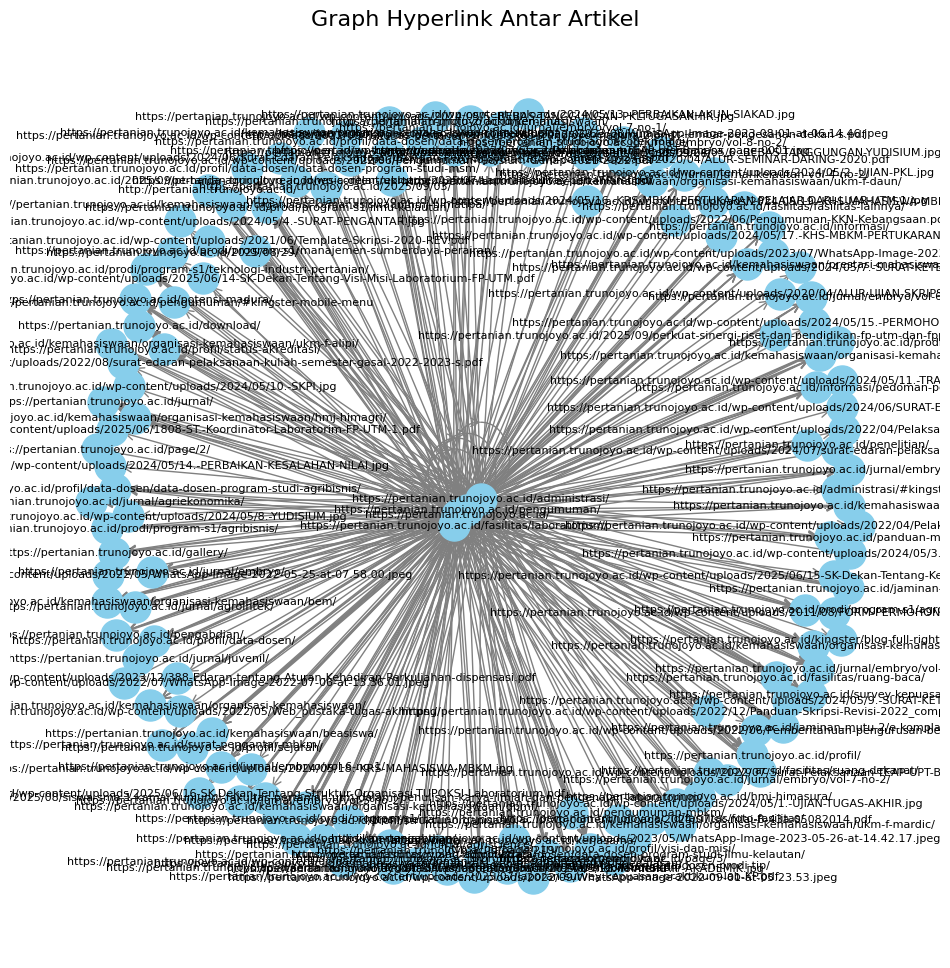

In [3]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

# buat directed graph
G = nx.DiGraph()

# baca CSV
with open("./csv/graph_links.csv", newline="", encoding="utf-8") as f:
    reader = csv.reader(f)
    next(reader)  # skip header

    for row in reader:
        no, asal, keluar = row
        G.add_edge(asal, keluar)  # tambahkan edge (arah dari asal ke keluar)

# ukuran figure
plt.figure(figsize=(12, 12))

# layout graph
pos = nx.spring_layout(G, k=0.5, seed=42)  # posisi node otomatis

# gambar nodes dan edges
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="skyblue")
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=15, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")

plt.title("Graph Hyperlink Antar Artikel", fontsize=16)
plt.axis("off")
plt.show()
